In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("E:/Anonymize_Loan_Default_data.csv/Anonymize_Loan_Default_data.csv", encoding="ISO-8859-1")
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,...,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,...,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,...,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,...,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,...,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0


In [5]:
df = df.dropna(subset=["loan_amnt", "int_rate", "repay_fail"])
x = df[["loan_amnt", "int_rate"]].values
y = df["repay_fail"].values.reshape(-1, 1) 

In [6]:
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
x = np.c_[np.ones(x.shape[0]), x]
s = int(0.8 * len(x))
x_train, x_test = x[:s], x[s:]
y_train, y_test = y[:s], y[s:]

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

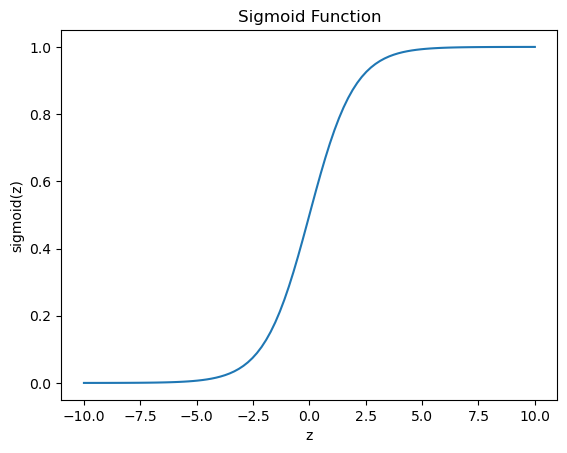

In [8]:
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z), label="Sigmoid Curve")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.title("Sigmoid Function")
plt.show()

In [26]:
def cost(x, y, w, b, lambda_reg):
    m = len(y)
    z = np.dot(x, w) + b
    predictions = sigmoid(z)
    loss = (-y * np.log(predictions)) - ((1 - y) * np.log(1 - predictions))
    cost = (np.sum(loss) + lambda_reg * np.sum(w ** 2)) / m
    return cost
print(cost)

<function cost at 0x000002525B61BB80>


In [12]:
def gradients(x, y, w, b, lambda_reg):
    m = len(y)
    z = np.dot(x, w) + b
    predictions = sigmoid(z)
    error = predictions - y
    dw = (np.dot(x.T, error) + lambda_reg * w) / m
    db = np.sum(error) / m
    return dw, db

In [21]:
w = np.zeros((x.shape[1], 1))  
b = 0
alpha = 0.01  
iterations = 500
lambda_values = [0.0001, 1, 100] #ugo 

In [22]:
costs_all = {}

for lambda_reg in lambda_values:
    w = np.zeros((x.shape[1], 1))
    b = 0
    costs = []

    for i in range(iterations):
        dw, db = gradients(x_train, y_train, w, b, lambda_reg)
        w -= alpha * dw
        b -= alpha * db
        costs.append(cost(x_train, y_train, w, b, lambda_reg))
    
    costs_all[lambda_reg] = costs

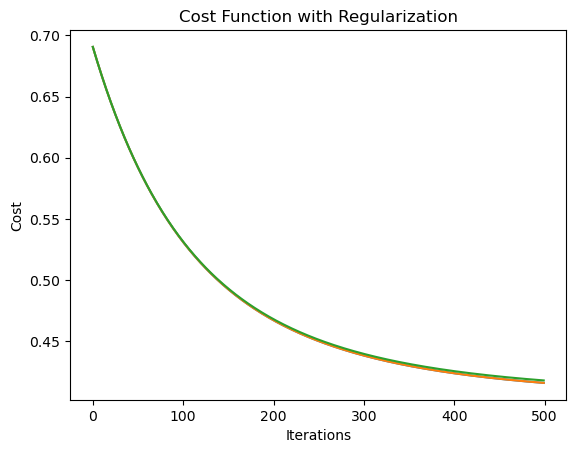

In [27]:
plt.figure()
for lambda_reg, cost_values in costs_all.items():
    plt.plot(range(iterations), cost_values, label=f"λ = {lambda_reg}")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function with Regularization")
plt.show()